# Import Libraries

In [274]:
# Importing libraries
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import *
from sklearn.preprocessing import QuantileTransformer , PowerTransformer , Normalizer
from sklearn.feature_selection import SelectPercentile , mutual_info_classif
from sklearn.cluster import KMeans , AgglomerativeClustering
from sklearn.metrics import *

import seaborn as sns

In [2]:
with open('Labels_TargetFeatures.txt') as LabelsName:
    Target = LabelsName.readline().strip()
    Features = LabelsName.readline().split()

# General Sub-Model 

The four sub-models have the same architecture:
1. Feature transformation
2. Feature selection
3. Clustering algorithm
4. Output probabilities

K-Means and Agglomerative Clustering were used as clustering algorithms

In [3]:
# Loading Dataset
ObesityDataset_Groups = pd.read_csv('../Exploratory_Data_Analysis/ObesityLevel_Groups.csv',index_col=0)
X_features_groups = ObesityDataset_Groups[Features].to_numpy()
y_target_groups = ObesityDataset_Groups[Target].to_numpy()

# Split train-test
X_train , X_test , y_train , y_test = train_test_split(X_features_groups,y_target_groups,test_size=0.2)

In [318]:
ScoreFunction_MutualInformation = lambda X,y : mutual_info_classif(X,y,n_neighbors=30)

# Clustering with K-Means
Model_K_Means = Pipeline(steps=[('Feature_Selection',SelectPercentile(score_func=ScoreFunction_MutualInformation,percentile=50)),
                                ('Clustering',KMeans(n_clusters=3))])

# Clustering with Agglomerative Clustering
Model_Agglomerative = Pipeline(steps=[('Feature_Selection',SelectPercentile(score_func=ScoreFunction_MutualInformation,percentile=50)),
                                      ('Clustering',AgglomerativeClustering(n_clusters=3))])

<Axes: xlabel='Weight', ylabel='Height'>

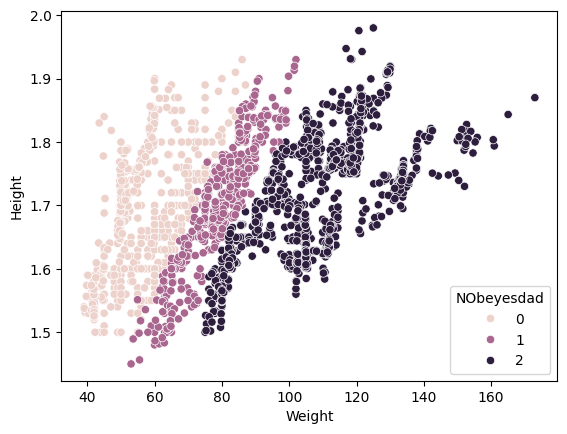

In [143]:
# Expected Result
sns.scatterplot(ObesityDataset_Groups,x='Weight',y='Height',hue='NObeyesdad')

np.float64(0.5480132791760716)

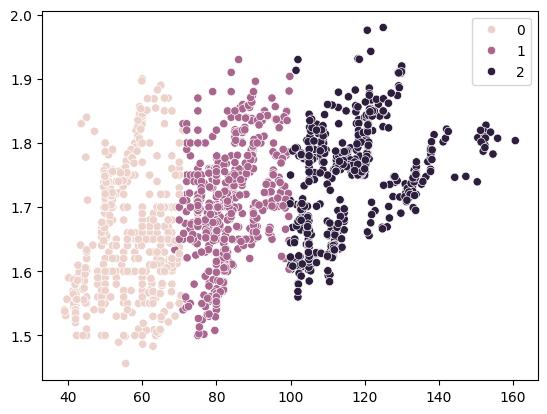

In [323]:
y_output = Model_K_Means.fit_predict(X_train,y_train)
sns.scatterplot(x=X_train[:,2],y=X_train[:,1],hue=y_output)

v_measure_score(y_train,y_output)

(1688, 8)

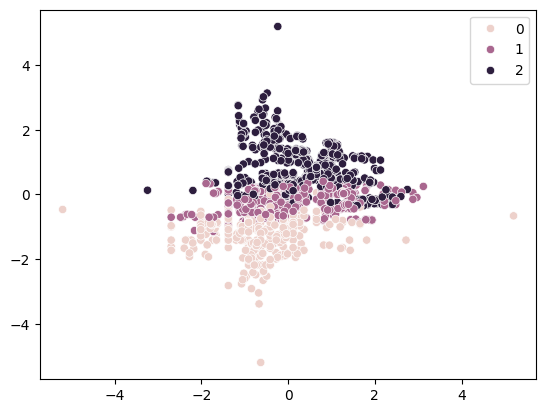

In [317]:
# Clustering with 
from sklearn.manifold import Isomap

ScoreFunction_MutualInformation = lambda X,y : mutual_info_classif(X,y,n_neighbors=32)
Model_ = Pipeline(steps=[
                        ('Feature_Selection',SelectPercentile(score_func=ScoreFunction_MutualInformation,percentile=50)),
                        ('Feature_Standardization',QuantileTransformer(output_distribution='normal')),
                        #('Dimensionality_Reduction',KernelPCA(n_components=8,kernel='poly',degree=5,coef0=0)),
                        ])

X_trans = Model_.fit_transform(X_train,y_train)

#y_output = KMeans(n_clusters=3,n_init=10).fit_predict(X_train)
#sns.scatterplot(x=X_train[:,2],y=X_train[:,1],hue=y_output)
sns.scatterplot(x=X_trans[:,0],y=X_trans[:,1],hue=y_train)
X_trans.shape
#homogeneity_completeness_v_measure(y_train,y_output)